# Importing and cleaning DAta

In [1]:
import pandas as pd 
df=pd.read_csv('diabetes.csv')

In [2]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1                        0.233   23        0  
2                        0.630   31        1  
3                        0.365   24        1  
4                        0.536   21        0  
...                        ...  ...      ...  
1995                     0.370   33        0  
1996                     0.719   36        1  
1997                     0.382   42        0  
1998                     0.319   26        1  
1999                     0.547   25        0  

[2000 rows x 9 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [4]:
df.shape

(2000, 9)

In [5]:
df.describe().transpose()

count       mean         std     min     25%  \
Pregnancies               2000.0    3.70350    3.306063   0.000   1.000   
Glucose                   2000.0  121.18250   32.068636   0.000  99.000   
BloodPressure             2000.0   69.14550   19.188315   0.000  63.500   
SkinThickness             2000.0   20.93500   16.103243   0.000   0.000   
Insulin                   2000.0   80.25400  111.180534   0.000   0.000   
BMI                       2000.0   32.19300    8.149901   0.000  27.375   
DiabetesPedigreeFunction  2000.0    0.47093    0.323553   0.078   0.244   
Age                       2000.0   33.09050   11.786423  21.000  24.000   
Outcome                   2000.0    0.34200    0.474498   0.000   0.000   

                              50%      75%     max  
Pregnancies                 3.000    6.000   17.00  
Glucose                   117.000  141.000  199.00  
BloodPressure              72.000   80.000  122.00  
SkinThickness              23.000   32.000  110.00  
Insulin                    40.000  130.000  744.00  
BMI                        32.300   36.800   80.60  
DiabetesPedigreeFunction    0.376    0.624    2.42  
Age                        29.000   40.000   81.00  
Outcome                     0.000    1.000    1.00

In [6]:
dfcopy=df.copy(deep = True)

In [7]:
dfcopy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Processing 

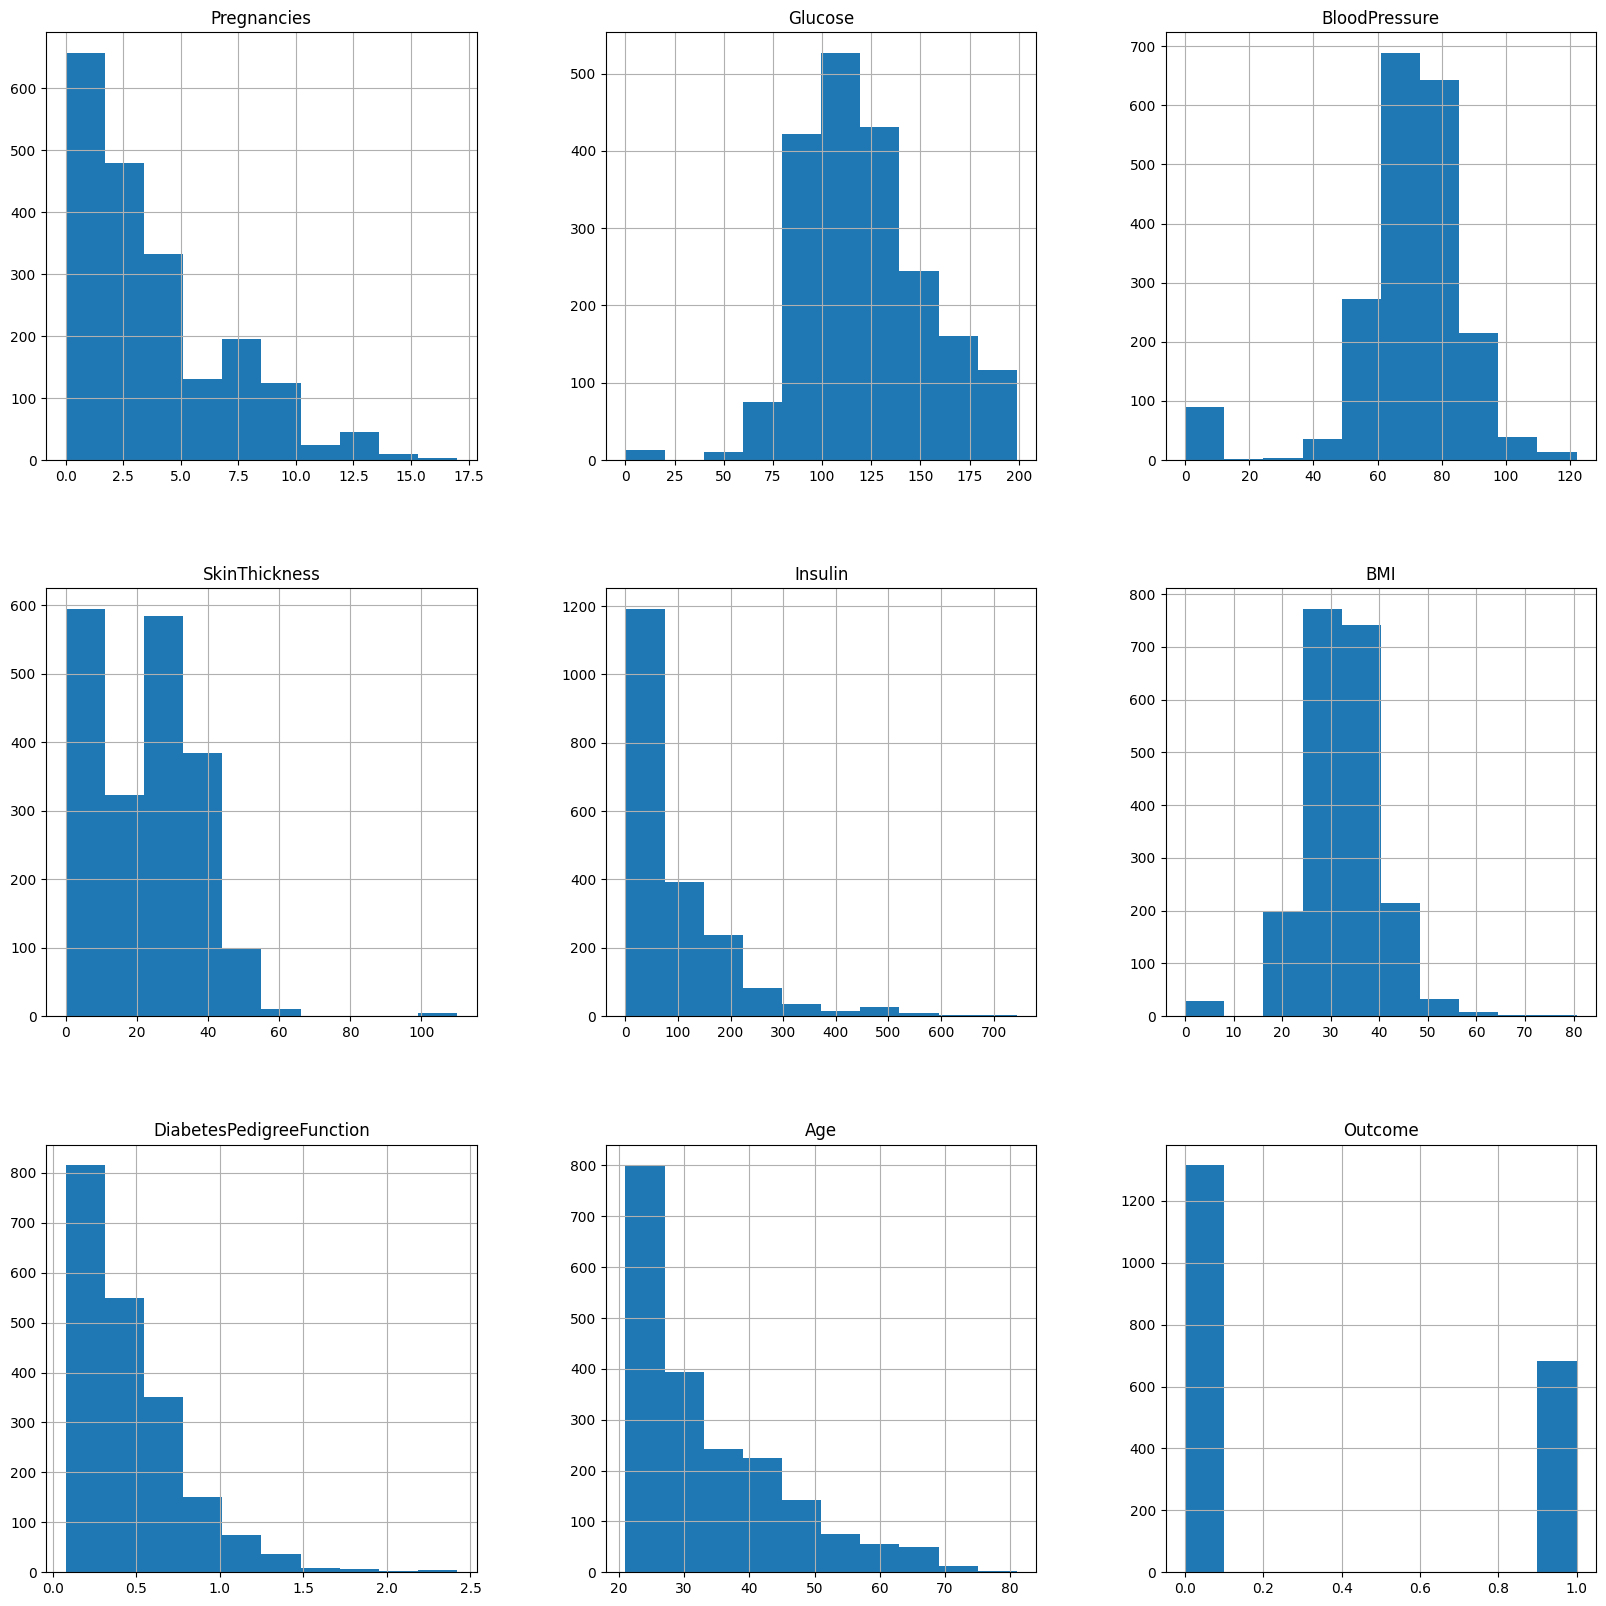

In [52]:
import seaborn as sns
p = df.hist(figsize = (20,20))

In [9]:
x=df.drop("Outcome", axis=1)
y=df['Outcome']
print(x)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  
0                        0.127   47  
1                      

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=42)

In [91]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1300, 8) (1300,)
(700, 8) (700,)


# Classification par les k-plus proches voisins : KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [98]:
knn.score(x_train,y_train)

0.9730769230769231

In [103]:
knn.score(x_test,y_test)

0.8657142857142858

<h3> classification_report , confusion_matrix

In [87]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.97      0.90       456
           1       0.92      0.68      0.78       244

    accuracy                           0.87       700
   macro avg       0.88      0.82      0.84       700
weighted avg       0.87      0.87      0.86       700



In [88]:
print(confusion_matrix(y_test,y_pred))

[[441  15]
 [ 79 165]]


Text(0.5, 23.52222222222222, 'Predicted label')

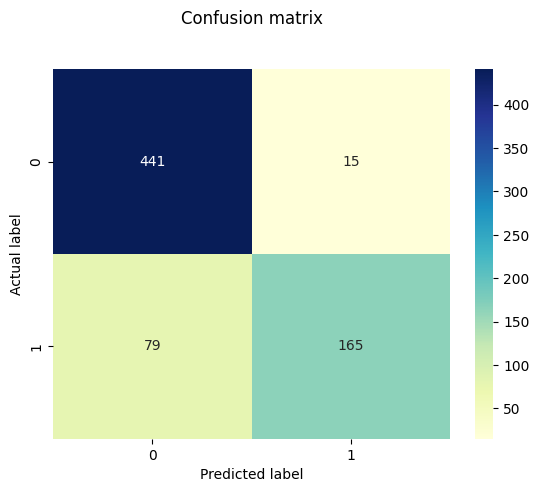

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

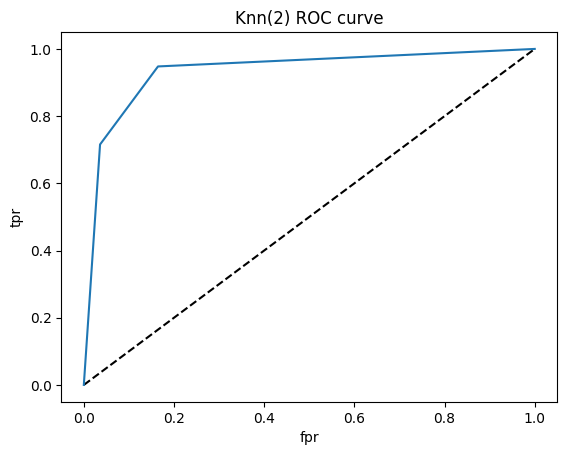

In [27]:

import matplotlib.pyplot as plt
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(2) ROC curve')
plt.show()

# Classification : Arbre de décision

In [77]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC = DTC.fit(x_train, y_train)
y_pred1 = DTC.predict(x_test)

In [78]:
from sklearn import metrics 
confusion_matrix(y_test, y_pred1)
print("confusion matrix",confusion_matrix(y_test, y_pred1))

print("la précision:", metrics.accuracy_score(y_test,y_pred1))

confusion matrix [[428  28]
 [ 22 222]]
la précision: 0.9285714285714286


In [79]:
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94       456
           1       0.89      0.91      0.90       244

    accuracy                           0.93       700
   macro avg       0.92      0.92      0.92       700
weighted avg       0.93      0.93      0.93       700



In [ ]:
##graphviz

In [31]:
from sklearn.tree import export_graphviz

from IPython.display import Image  
import pydotplus
from six import StringIO

In [32]:
features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

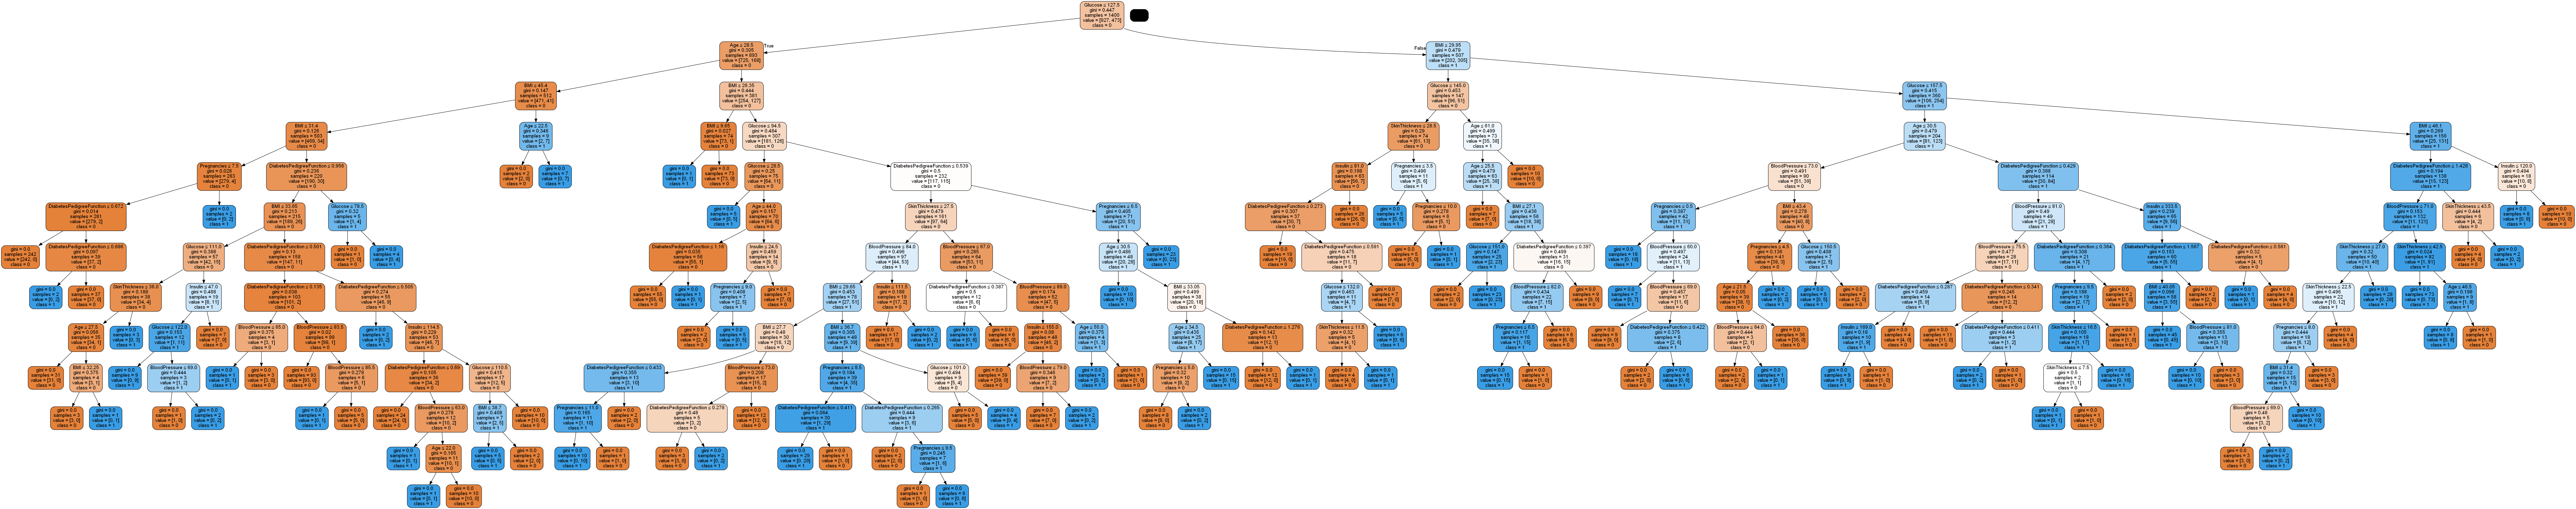

In [33]:
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

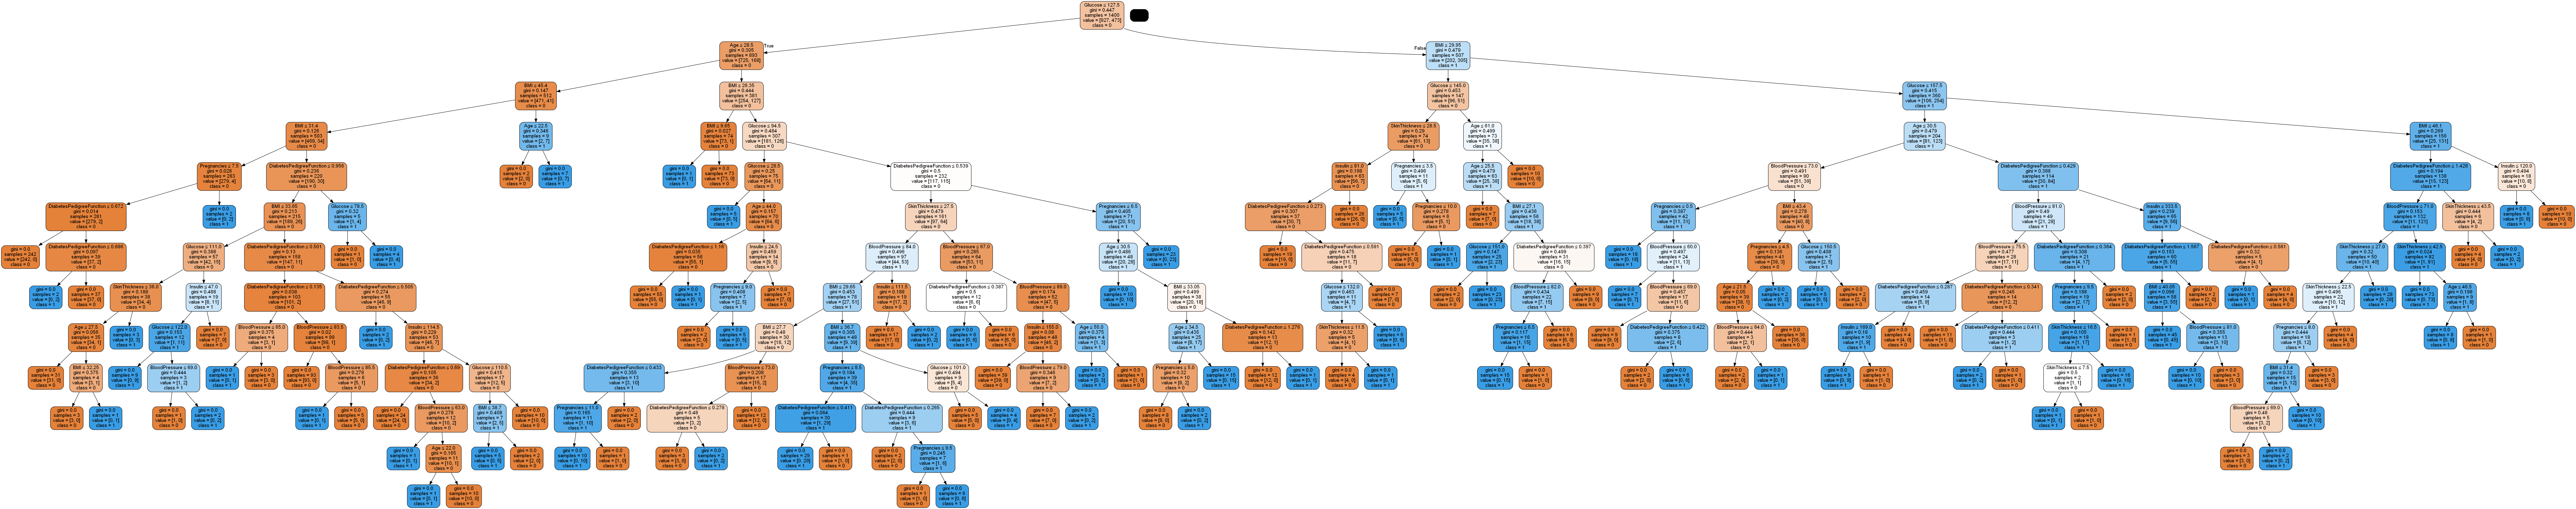

In [35]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabete-arbre.png')
Image(graph.create_png())

[Text(0.44626420454545457, 0.9615384615384616, 'X[1] <= 127.5\ngini = 0.447\nsamples = 1400\nvalue = [927, 473]'),
 Text(0.18184659090909092, 0.8846153846153846, 'X[7] <= 28.5\ngini = 0.305\nsamples = 893\nvalue = [725, 168]'),
 Text(0.11522727272727273, 0.8076923076923077, 'X[5] <= 45.4\ngini = 0.147\nsamples = 512\nvalue = [471, 41]'),
 Text(0.07681818181818181, 0.7307692307692307, 'X[5] <= 31.4\ngini = 0.126\nsamples = 503\nvalue = [469, 34]'),
 Text(0.02181818181818182, 0.6538461538461539, 'X[0] <= 7.5\ngini = 0.028\nsamples = 283\nvalue = [279, 4]'),
 Text(0.014545454545454545, 0.5769230769230769, 'X[6] <= 0.672\ngini = 0.014\nsamples = 281\nvalue = [279, 2]'),
 Text(0.007272727272727273, 0.5, 'gini = 0.0\nsamples = 242\nvalue = [242, 0]'),
 Text(0.02181818181818182, 0.5, 'X[6] <= 0.686\ngini = 0.097\nsamples = 39\nvalue = [37, 2]'),
 Text(0.014545454545454545, 0.4230769230769231, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.02909090909090909, 0.4230769230769231, 'gini = 0.

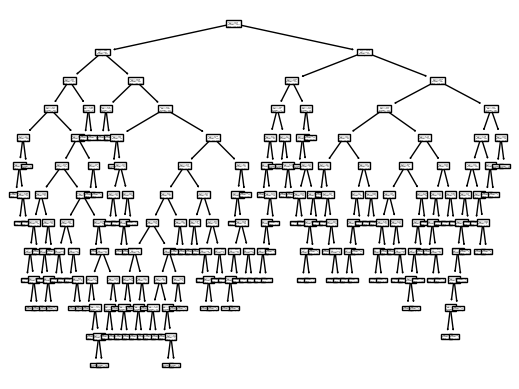

In [54]:
from sklearn import tree
tree.plot_tree(DTC)

# svc

In [109]:
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3 = train_test_split(x,y,test_size=0.35,random_state=42)

In [119]:
from sklearn import svm
clf = svm.SVC(gamma='auto')
clf.fit(x_train3,y_train3)
y_pred3 = clf.predict(x_test3)

In [121]:
print("Accuracy:", accuracy_score(y_test3, y_pred3))

Accuracy: 0.9257142857142857


In [122]:
confusion_matrix(y_test3,y_pred3)

array([[456,   0],
       [ 52, 192]], dtype=int64)

In [123]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test3, y_pred3))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95       456
           1       1.00      0.79      0.88       244

    accuracy                           0.93       700
   macro avg       0.95      0.89      0.91       700
weighted avg       0.93      0.93      0.92       700



# GridSearchCV

In [125]:
from sklearn.model_selection import  GridSearchCV
import numpy as np

k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [126]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [129]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(x, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=2),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [130]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.9935 0.9545 0.914  0.825  0.802  0.82   0.8355 0.8145 0.7945 0.7885
 0.783  0.782  0.7775 0.7745 0.7745 0.777  0.773  0.78   0.7775 0.777
 0.777  0.78   0.7745 0.781  0.773  0.771  0.7725 0.7725 0.7675 0.7695]


In [132]:
grid.best_score_

0.9935

In [131]:
grid.best_params_

{'n_neighbors': 1}

In [134]:

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'KNeighborsClassifier' : {
        'model': KNeighborsClassifier(),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df